> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


I decided to analyze no show appointment data set. The analysis is done in context to find if there is any relation between patients presence with any condition.

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
from datetime import datetime

<a id='wrangling'></a>
## Data Wrangling


Imported the data and made some general observation about data, if null is present, duplicates are present, data types etc

### General Properties



In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [3]:
'''
No null records found
'''
df.info() 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [4]:
'''First look of data'''
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [5]:
'''No duplicates present'''
print(sum(df.duplicated()))
df.drop_duplicates(inplace=True) #no duplicates found

0


> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning 


<ul>
<li> Convert Appointment day into date format.
<li> Convert Scheduled day into date format.
<li> Check anomalies in data entry with date, i.e ignore data where schedule day is after appointment day. 
<li> Rename No-show to more explanatory AppointmentAttendance and store numerical value, 1 for present and 0 for absence for ease of analysis. 
<li> Save day difference between appointment day and scheduled day for further EDA. 
</ul>

In [6]:
'''Convert days from string to date format'''

df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'], format="%Y-%m-%d").dt.date
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'], format="%Y-%m-%d").dt.date


In [7]:
'''check if any anomalies are present with date where appointment date is less than scheduled date'''
np.where(df['AppointmentDay'] < df['ScheduledDay'])

(array([27033, 55226, 64175, 71533, 72362]),)

In [8]:
'''confirm the above output'''
df.loc[27033]

PatientId         7.83927e+12
AppointmentID         5679978
Gender                      M
ScheduledDay       2016-05-10
AppointmentDay     2016-05-09
Age                        38
Neighbourhood     RESISTÊNCIA
Scholarship                 0
Hipertension                0
Diabetes                    0
Alcoholism                  0
Handcap                     1
SMS_received                0
No-show                   Yes
Name: 27033, dtype: object

In [9]:
'''save difference of appointment date and scheduled date in a new column to filter upon'''
df['DeltaAppointmentScheduled'] = (df['AppointmentDay'] - df['ScheduledDay']).dt.days

In [10]:
'''filter all record where date delta is not equal or greater than 0'''
df = df[df['DeltaAppointmentScheduled'] >= 0]

In [11]:
'''confirm the number of rows, it should be original raw number - number of anomalies detected in np.where'''
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110522 entries, 0 to 110526
Data columns (total 15 columns):
PatientId                    110522 non-null float64
AppointmentID                110522 non-null int64
Gender                       110522 non-null object
ScheduledDay                 110522 non-null object
AppointmentDay               110522 non-null object
Age                          110522 non-null int64
Neighbourhood                110522 non-null object
Scholarship                  110522 non-null int64
Hipertension                 110522 non-null int64
Diabetes                     110522 non-null int64
Alcoholism                   110522 non-null int64
Handcap                      110522 non-null int64
SMS_received                 110522 non-null int64
No-show                      110522 non-null object
DeltaAppointmentScheduled    110522 non-null int64
dtypes: float64(1), int64(9), object(5)
memory usage: 13.5+ MB


In [12]:
'''rename No-Show to appointment attendance'''
df.rename(columns = {'No-show' : 'AppointmentAttendance'} , inplace=True)

In [13]:
'''replace NO with 1 and Yes with 0'''
df['AppointmentAttendance'].replace("No", 1, inplace=True)
df['AppointmentAttendance'].replace("Yes", 0, inplace=True)

In [14]:
'''have a look at data again'''
print(df.info())
df.head(1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110522 entries, 0 to 110526
Data columns (total 15 columns):
PatientId                    110522 non-null float64
AppointmentID                110522 non-null int64
Gender                       110522 non-null object
ScheduledDay                 110522 non-null object
AppointmentDay               110522 non-null object
Age                          110522 non-null int64
Neighbourhood                110522 non-null object
Scholarship                  110522 non-null int64
Hipertension                 110522 non-null int64
Diabetes                     110522 non-null int64
Alcoholism                   110522 non-null int64
Handcap                      110522 non-null int64
SMS_received                 110522 non-null int64
AppointmentAttendance        110522 non-null int64
DeltaAppointmentScheduled    110522 non-null int64
dtypes: float64(1), int64(10), object(4)
memory usage: 13.5+ MB
None


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,AppointmentAttendance,DeltaAppointmentScheduled
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,1,0


In [15]:
'''describe the data to see more details'''
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,AppointmentAttendance,DeltaAppointmentScheduled
count,1.105220e+05,1.105220e+05,110522.000000,110522.000000,110522.000000,110522.000000,110522.000000,110522.000000,110522.000000,110522.000000,110522.000000
mean,1.474935e+14,5.675305e+06,37.089041,0.098270,0.197255,0.071868,0.030401,0.022231,0.321040,0.798104,10.184253
std,2.560866e+14,7.129722e+04,23.110064,0.297681,0.397928,0.258270,0.171689,0.161493,0.466878,0.401417,15.255115
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640284e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,3.173700e+13,5.680574e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000
75%,9.439277e+13,5.725525e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,15.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,179.000000


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 - What is the presence and abscence percent overall ?

In [16]:
'''Taking mean calculating percent of all patients present for appointment overall'''
present = df["AppointmentAttendance"].mean()*100

In [17]:
'''Simple maths, the abscent percent will be 100 - present percent '''
abscent = 100 - present


print("No of patients present ", round(present,2) , "%")
print("No of patients NOT present ", round(abscent,2) , "%")

No of patients present  79.81 %
No of patients NOT present  20.19 %


### Research Question 2 - Is there any impact of difference between ScheduledDay and  AppointmentDay on presence of patients?

In [18]:
'''Filter all present and abscent data in different data frames to be used later for histogram'''

df_present = df.query("AppointmentAttendance == 1")
df_not_present = df.query("AppointmentAttendance == 0")

In [19]:
'''Check no of rows present in patients present data frame etc'''
df_present.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88208 entries, 0 to 110526
Data columns (total 15 columns):
PatientId                    88208 non-null float64
AppointmentID                88208 non-null int64
Gender                       88208 non-null object
ScheduledDay                 88208 non-null object
AppointmentDay               88208 non-null object
Age                          88208 non-null int64
Neighbourhood                88208 non-null object
Scholarship                  88208 non-null int64
Hipertension                 88208 non-null int64
Diabetes                     88208 non-null int64
Alcoholism                   88208 non-null int64
Handcap                      88208 non-null int64
SMS_received                 88208 non-null int64
AppointmentAttendance        88208 non-null int64
DeltaAppointmentScheduled    88208 non-null int64
dtypes: float64(1), int64(10), object(4)
memory usage: 10.8+ MB


In [20]:
'''check no of rows in not present data frame'''
df_not_present.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22314 entries, 6 to 110516
Data columns (total 15 columns):
PatientId                    22314 non-null float64
AppointmentID                22314 non-null int64
Gender                       22314 non-null object
ScheduledDay                 22314 non-null object
AppointmentDay               22314 non-null object
Age                          22314 non-null int64
Neighbourhood                22314 non-null object
Scholarship                  22314 non-null int64
Hipertension                 22314 non-null int64
Diabetes                     22314 non-null int64
Alcoholism                   22314 non-null int64
Handcap                      22314 non-null int64
SMS_received                 22314 non-null int64
AppointmentAttendance        22314 non-null int64
DeltaAppointmentScheduled    22314 non-null int64
dtypes: float64(1), int64(10), object(4)
memory usage: 2.7+ MB


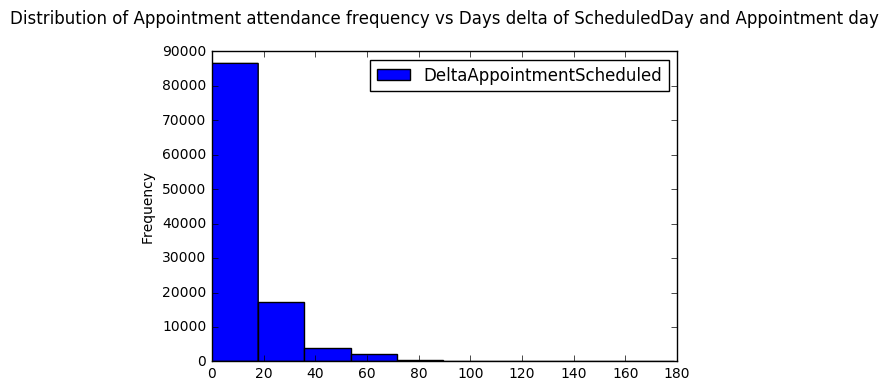

In [21]:
'''Plot the frequency of delta of scheduled and appointment date to see the overall distribution, this makes it
very clear that majority of data points is distributes till 100 days'''
df.plot(x="AppointmentAttendance", y= "DeltaAppointmentScheduled", kind="hist", title="Distribution of Appointment attendance frequency vs Days delta of ScheduledDay and Appointment day\n")


By looking at the above histogram we could see that the distrubution of attendance is right skewed. The less is difference between ScheduledDay and AppointmentDay the more is probability of patients to not miss the appointment.

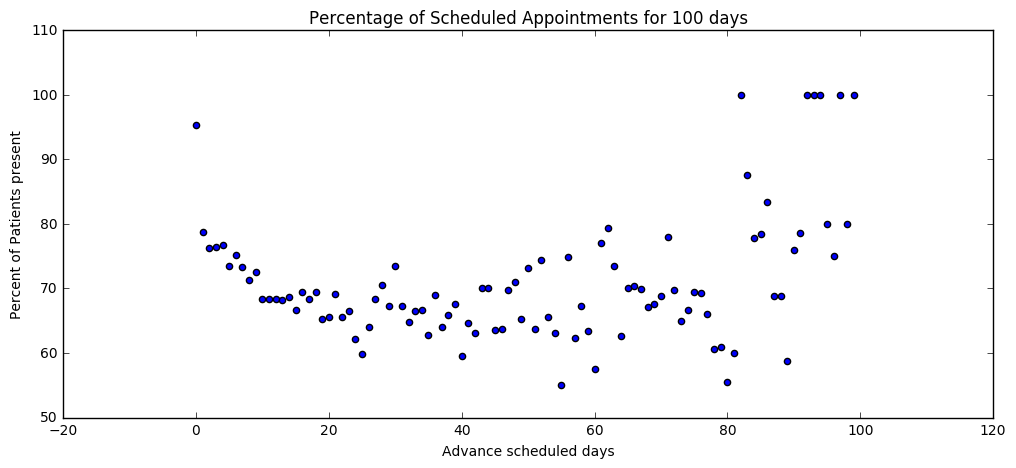

In [22]:
''' Plot distribution of percent of patients present in 100 days delta'''

y = df.groupby('DeltaAppointmentScheduled')['AppointmentAttendance'].mean()[0:100]*100
x = range(0, 100)
plt.figure(figsize=(12,5))
plt.scatter(x,y);
plt.title("Percentage of Scheduled Appointments for 100 days");
plt.xlabel("Advance scheduled days");
plt.ylabel("Percent of Patients present");

In above scatter plot we could see that the correlation is negative, the data points are more dense and higher when
advance scheduled date is less and tends to be more distributes and lower afterwards. The point to note here is, the
density is higher in BIN 0-20 even when the actual data points is highest so it means the probability is also higher here
along with percentage.

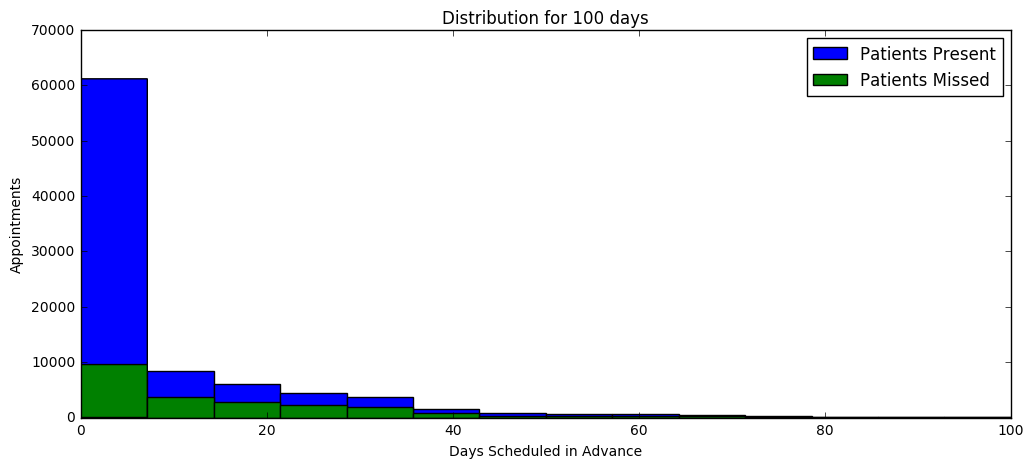

In [23]:
'''Plot histogram of patients present and anscent, each bin represents 1 weeks here'''
plt.figure(figsize=(12,5))
plt.hist(df_present['DeltaAppointmentScheduled'], bins=14, range=(0,100));
plt.hist(df_not_present['DeltaAppointmentScheduled'], bins=14, range=(0,100));
plt.legend(['Patients Present','Patients Missed']);
plt.title('Distribution for 100 days');
plt.xlabel('Days Scheduled in Advance')
plt.ylabel('Appointments');

In above histogram we could see the distribution of number of patients missed and patients present after taking appointment. we could see there is similar trend in both of the plot. Patients missing and patients present distribution 
both are right skewed.

In [24]:
'''Get percent of patients present if the difference of appointment and scheduled day is between different range '''

print(df.query("DeltaAppointmentScheduled < 10 ")['AppointmentAttendance'].mean()*100)
print(df.query("DeltaAppointmentScheduled < 20 and DeltaAppointmentScheduled > 10")['AppointmentAttendance'].mean()*100)
print(df.query("DeltaAppointmentScheduled < 30 and DeltaAppointmentScheduled > 20")['AppointmentAttendance'].mean()*100)
print(df.query("DeltaAppointmentScheduled < 40 and DeltaAppointmentScheduled > 30")['AppointmentAttendance'].mean()*100)
print(df.query("DeltaAppointmentScheduled < 50 and DeltaAppointmentScheduled > 40")['AppointmentAttendance'].mean()*100)
print(df.query("DeltaAppointmentScheduled < 60 and DeltaAppointmentScheduled > 50")['AppointmentAttendance'].mean()*100)
print(df.query("DeltaAppointmentScheduled < 70 and DeltaAppointmentScheduled > 60")['AppointmentAttendance'].mean()*100)
print(df.query("DeltaAppointmentScheduled < 80 and DeltaAppointmentScheduled > 70")['AppointmentAttendance'].mean()*100)
print(df.query("DeltaAppointmentScheduled < 90 and DeltaAppointmentScheduled > 80")['AppointmentAttendance'].mean()*100)
print(df.query("DeltaAppointmentScheduled < 100 and DeltaAppointmentScheduled > 90")['AppointmentAttendance'].mean()*100)

85.70797348865234
68.12265431605844
66.97741868655478
65.81715210355988
66.09625668449198
66.45833333333333
72.27272727272728
68.23529411764706
73.93939393939394
81.0126582278481


### Research Question 3  Is there any relation of presence of patients and any medical conditions (including alcoholism) ?

In [25]:
'''Percent of patients present with no medical condition'''

non_patients = df.query("Hipertension == 0 and Handcap == 0 and Diabetes == 0 and Alcoholism == 0")['AppointmentAttendance'].mean()*100
print("Percent of people with no medical conditions present is ", round(non_patients, 2), "%")

patients = df.query("Hipertension == 1 or Handcap == 1 or Diabetes == 1 or Alcoholism == 1")['AppointmentAttendance'].mean()*100
print("Percent of people with atleast 1 issue present is ", round(patients, 2), "%")




Percent of people with no medical conditions present is  79.08 %
Percent of people with atleast 1 issue present is  82.14 %


Hipertension    16.904186
Diabetes         6.408533
Alcoholism       3.033970
Handcap          2.021153
dtype: float64
Hipertension    20.439189
Diabetes         7.383684
Alcoholism       3.041674
Handcap          2.274170
dtype: float64


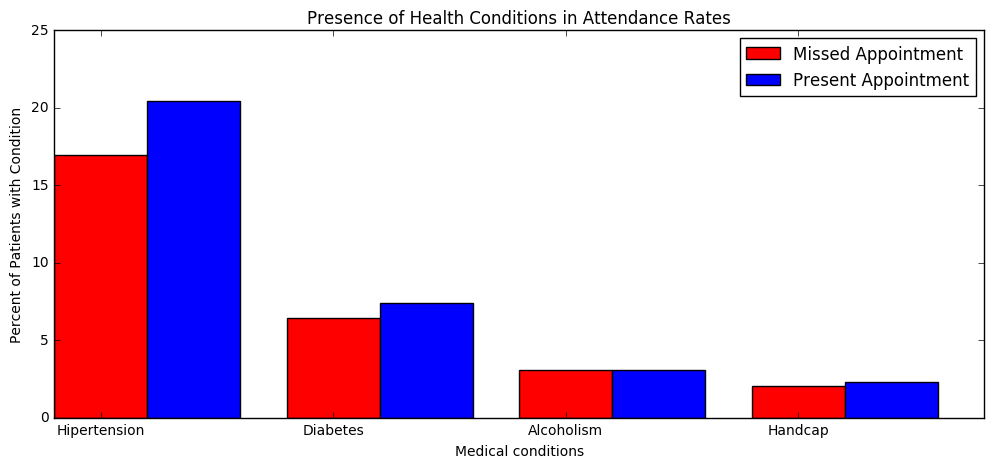

In [26]:
'''represent appointment data medical condition wise'''
present_means = df_present.mean()
abcent_means = df_not_present.mean()

import numpy as np
plt.figure(figsize=(12,5))
plt.title('Presence of Health Conditions in Attendance Rates')

labels = present_means.index[4:8].tolist()

location = np.arange(1,len(labels)+1) + .2

yaxis_abcent = abcent_means[4:8]*100
print(yaxis_abcent)
yaxis_present = present_means[4:8]*100
print(yaxis_present)
plt.bar(location-.2,yaxis_abcent, width=.4, label='Missed Appointment', color='r')
plt.bar(location+.2,yaxis_present, width=.4, label='Present Appointment', color='b')

plt.xticks(location, labels)
plt.ylabel('Percent of Patients with Condition')
plt.xlabel('Medical conditions')
plt.legend()


We could see except Alcoholism in every other medical condition Patients missing is less than non missing audience.
This means in an actual medical condition patients tends to not miss the appointment.

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!

### 1. 20 % (1 out of every 5 appointment) is a no-show appointment.

No of patients present 79.81 %, No of patients NOT present  20.19 %

After further investigation we also found that, Percent of people with no medical conditions present is  79.08 %, Percent of people with atleast 1 issue present is  82.14 %.



### 2. Patients are more likely to miss appointment if the gap between the scheduled date and appointment date is greater.

The relation is cleary right skewed and represented in graph earlier. We found that the percent of people not missing the appointment is the gap between scheduled and appointment date is less than 10 is 85 %, which goes down to 60-70 % for every other interval. Some reasons could be: <br>

1) Patients forgets their appointments if the gap is bigger.
2) Patients might require medical attention ASAP and hence the schedule an appointment date nearby.


### 3. Patients with at least 1 issue (alcoholism , hyper tension, diabetes , handcap) are more likely to report than patients with no issue.


The presence percent of patients with any 1 issue is greater by 3 % than patients with no issue.Percent of people with no medical conditions present is  79.08 % and Percent of people with atleast 1 issue present is  82.14 %.
Patients with Hypertension are 4 % more likely to not miss the appointment and patients of diabetes are 1 % more likely to not miss the appointment.


## Limitation and Scope of improvements

### 1) No analysis is performed on various other data points, like impact of SMS on likelihood of No-Show. Impact of Neighbourhood and Age and gender on patients missing the appointments

### 2) We could dig deeper in combination arithmetic by including various different parameters and check some correlation, example. The report of a particular Age group in any neighbourhood of a particular gender.